## Problema de valor inicial para EDPs parabólicas
### Resolução numérica por diferenças finitas

As equações da **difusão** e do **calor** 1D são 

$$\frac{\partial u}{\partial t}-D \frac{\partial^2 u}{\partial x^2}=0$$

$$
\frac{\partial u}{\partial t}-K \frac{\partial^2 u}{\partial x^2}=f(x, t)$$

A constante $K$ na equação do calor é a difusividade térmica do material.

As **condições iniciais** do problema especificam as soluções em todo dominio espacial, para o instante $t_0$, ou seja:

$$u\left(x, t_0\right)=u^0(x), \quad x \in[0,L]$$

As **condições de contorno** definem o comportamento da solução nos contornos em todos os instantes $t>t_0$. Por simplicidade, por enquanto, vamos considerar as condições de contorno de *Dirichlet*, em qua a solução é constante no contorno, ou seja:

$$u\left(x, t_0\right)=u^0(x), \quad x \in[0, L].$$

### Método das diferenças finitas explícito 

Começaremos discretizando a equação da difusão e as condições de contorno estabelecendo uma grade regular caracterizada pelos nós $x_i$ no espaço e $t_n$ no tempo.

$$x_i=(i-1) h_x, \quad i=1,2, \ldots, N_x$$
$$t_n=n h_t, \quad n=0,1,2, \ldots$$

em que $h_x$ é a distânca entre os nós e $h_n$ é o passo de tempo. 

Para a discretização da derivada primeira em relação ao tempo fazemos 

$$\left(\frac{\partial u}{\partial t}\right)_{i, n}=\frac{u_i^{n+1}-u_i^n}{h_t}$$

Para a derivada de segunda ordem no espaço, fazemos 

$$\left(\frac{\partial^2 u}{\partial x^2}\right)_{i, n}=\frac{u_{i+1}^n-2 u_i^n+u_{i-1}^n}{h_x^2}$$

Inserindo os esquemas de diferenças finitas na equação o seginte método *foward-time central-space* (FTCS):

$$
\frac{u_i^{n+1}-u_i^n}{h_t}=D \frac{u_{i+1}^n-2 u_i^n+u_{i-1}^n}{h_x^2}
$$



Agora podemos expressar a solução propagada no tempo $t_{n+1}$ para cada um dos $N_x-2$ pontos $x_i$ no interior da malha em termos de valores no tempo $t_n$

$$u_i^{n+1}=\lambda u_{i-1}^n+(1-2 \lambda) u_i^n+\lambda u_{i+1}^n, \quad i=2,3, \ldots, N_x-1$$

em que 

$$\lambda=\frac{D h_t}{h_x^2}$$

Para as extremidades, a solução permanece constante e igual à condição inicial (condição de *Dirichlet*), ou seja, 

$$
u_1^{n+1}=u_1^n=u_0^0, \quad u_{N_x}^{n+1}=u_{N_x}^n=u_L^0
$$


Na forma matricial podemas escrever 
$$
\mathbf{u}^{n+1}=\mathbf{B} \cdot \mathbf{u}^n, \quad n=0,1,2, \ldots
$$

A matriz de propagação $\mathbf{B}$ é triagonal e o vetor $\mathbf{u}^n$ fornece a solução em todos os pontos da malha para o passo de tempo $t_n$

$$
\mathbf{B}=\left[\begin{array}{ccccc}
1 & 0 & & & 0 \\
\lambda & 1-2 \lambda & \lambda & & \\
& \ddots & \ddots & \ddots & \\
& & \lambda & 1-2 \lambda & \lambda \\
0 & & & 0 & 1
\end{array}\right], \quad \mathbf{u}^n=\left[\begin{array}{c}
u_1^n \\
u_2^n \\
\vdots \\
u_{N_n-1}^n \\
u_{N_x}^n
\end{array}\right]$$

Cada componente da solução propagada $\mathbf{u}^{n+1}$ resulta do produto da matriz $\mathbf{B}$ com o vetor  $\mathbf{u}^{n}$. $$$$

**Exemplo 1:** (Beu, 2014) Vamos resolver a equação da difusão 1D

$$
\frac{\partial u}{\partial t}=D \frac{\partial^2 u}{\partial x^2}, \quad x \in[0, L], \quad t>0
$$

com coeficiente de difusão constante, sujeita às condições de contorno de Dirichlet

$$
u(0, t)=u(L, t)=0, \quad t>0
$$

e com a condição inicial dada por

$$
u(x, 0)=\sin (\pi x / L), \quad x \in[0, L] .
$$





A solução exata para esse problema é dada por

$$u(x,t)=e^{\frac{-\pi^2Dt}{L^2}} \text{sen}\left(\frac{\pi x}{L} \right) .$$

Vamos usar nesse exemplo $L=1$, $D=0.1$, $h_t = 0.00125 s$ e $h_x=0.05$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 1                        # comprimento da barra
nx = 20                      # número de subintervalos em x
D = 0.1                      # difusividade térmica 
ht=0.0125                    # tamanho do passo de tempo
hx = L/nx                    # espaçamento entre os nós
lamb =  D*ht/hx**2           # lambda

In [3]:
x = np.linspace(0,L,nx+1)     # criação da malha
u = np.sin(np.pi*x)           # criando o vetor u0=0

In [4]:
# criação da matriz B
B = np.eye(len(x))            # criando uma matriz identidade
for i in range(1,len(B)-1):   # alterando as diagonais
    B[i,i-1]=lamb               
    B[i,i]=1-2*lamb
    B[i,i+1]=lamb

In [5]:
# propagando e armazenando as soluções
sol = np.array([u])
for n in range(480):
    u[0]=u[-1]=0
    u = B@u 
    sol = np.vstack((sol,[u]))

In [6]:
# escrevendo a solução exata
sol_ex = lambda x,t: np.exp(-np.pi**2*D*t/L**2)*np.sin(np.pi*x/L) 

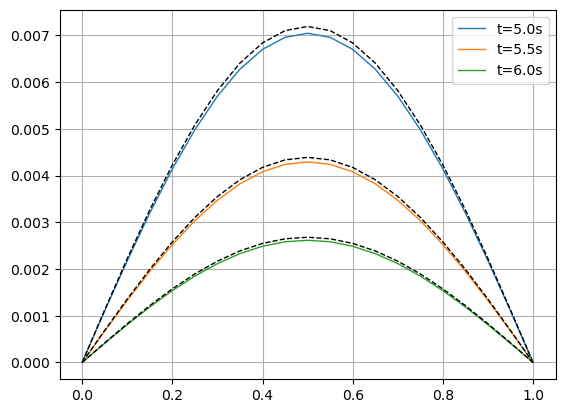

In [7]:
# plotando para alguns valores de t
fig, ax = plt.subplots()
ns = [400,440,480]
for n in ns:
    label='t='+str(n*ht)+'s'
    plt.plot(x,sol[n],label=label, lw=1)
    s_ex = sol_ex(x,n*ht)
    plt.plot(x, s_ex, "k--", lw=1)
ax.legend()
ax.grid()
plt.show()

Segundo o critério de von Neumann, o método irá convergir para valores de $\lambda$ tais que $0<\lambda<1/2$.

**Como experimento, tente mudar o passo de tempo para $h_t=0.013$ no exemplo anterior e veja o resultado.**



### Método das diferenças finitas implícito

Fazendo uma pequena mudança no esquema de diferenças finitas apresentado anteriormente, referindo-se ao passo de tempo $t_{n+1}$ ao invés de $t_n$ nas discretizações do espaço e do tempo, obtemos um esquema incondicionalmente estável.

Para isso, na derivada primeira em relação ao tempo fazemos 

$$\left(\frac{\partial u}{\partial t}\right)_{i, n+1}=\frac{u_i^{n+1}-u_i^n}{h_t}$$

Para a derivada de segunda ordem no espaço, fazemos 

$$\left(\frac{\partial^2 u}{\partial x^2}\right)_{i, n+1}=\frac{u_{i+1}^{n+1}-2 u_i^{n+1}+u_{i-1}^{n+1}}{h_x^2}$$

Inserindo os esquemas de diferenças finitas na equação o seguinte método *backward-time central-space* (BTCS):

$$
\frac{u_i^{n+1}-u_i^n}{h_t}=D \frac{u_{i+1}^{n+1}-2 u_i^{n+1}+u_{i-1}^{n+1}}{h_x^2}
$$


Reagrupando os termos e fazendo $\lambda=D h_t / h_x^2$ obtemos a equação para a propagação da solução $u_i^{n+1}$ nos pontos interiores da malha na forma

$$
u_1^{n+1}=u_1^n=u_0^0, \quad u_{N_x}^{n+1}=u_{N_x}^n=u_L^0
$$

o sistema ormado pelas equações pode ser resolvidos com apropriadas condições de contorno, em particular as condições de Dirichlet

$$u_1^{n+1}=u_1^n=u_0^0, \quad u_{N_x}^{n+1}=u_{N_x}^n=u_L^0$$

mantêm valores constantes para a solução nos contornos.

Em notação matricial o sistema a ser resolvido é dado por 

$$
\mathbf{A} \cdot \mathbf{u}^{n+1}=\mathbf{u}^n, \quad n=0,1,2, \ldots
$$

sendo $\mathbf{A}$ a matriz tridiagonal

$$
\mathbf{A}=\left[\begin{array}{ccccc}
1 & 0 & & & \\
-\lambda & 1+2 \lambda & -\lambda & & \\
& \ddots & \ddots & \ddots & \\
& & -\lambda & 1+2 \lambda & -\lambda \\
& & & 0 & 1
\end{array}\right]
$$

**Exemplo 2:** Repetindo o exemplo 1, mas agora usando o esquema implícito.

In [8]:
x = np.linspace(0,L,nx+1)     # criação da malha
u = np.sin(np.pi*x)           # criando o vetor u0=0

In [9]:
# criação da matriz A
A = np.eye(len(x))            # criando uma matriz identidade
for i in range(1,len(B)-1):   # alterando as diagonais
    A[i,i-1]=-lamb               
    A[i,i]=1+2*lamb
    A[i,i+1]=-lamb

In [10]:
# propagando e armazenando as soluções
sol = np.array([u])
for n in range(480):
    u[0]=u[-1]=0
    u = np.linalg.solve(A,u) 
    sol = np.vstack((sol,[u]))

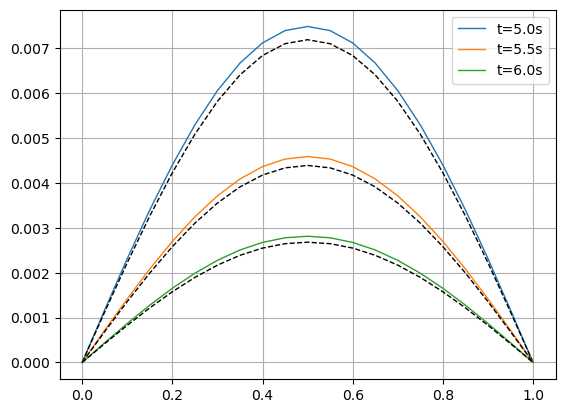

In [11]:
# plotando para alguns valores de t
fig, ax = plt.subplots()
ns = [400,440,480]
for n in ns:
    label='t='+str(n*ht)+'s'
    plt.plot(x,sol[n],label=label, lw=1)
    u = sol_ex(x,n*ht)
    plt.plot(x, u, "k--", lw=1)
ax.legend()
ax.grid()
plt.show()

### Método de Crank–Nicolson

O método de Crank-Nicolson realiza a discretização no tempo em um passo intermediário $t_{n+1/2} = t_n+h_t/2$ o que leva a uma redução no erro de aproximação da derivada no tempo (resulta em acurácia de segunda ordem no tempo e no espaço). Considere a expanção de Taylor da solução em $t_n$ e $t_{n+1}$ em torno do ponto $t_{n+1/2}$:

$$
\begin{aligned}
u_i^n & =u_i^{n+1 / 2}-\left(\frac{h_t}{2}\right)\left(\frac{\partial u}{\partial t}\right)_{i, n+1 / 2}+\frac{1}{2}\left(\frac{h_t}{2}\right)^2\left(\frac{\partial^2 u}{\partial t^2}\right)_{i, n+1 / 2}+O\left(h_t^3\right) \\
u_i^{n+1} & =u_i^{n+1 / 2}+\left(\frac{h_t}{2}\right)\left(\frac{\partial u}{\partial t}\right)_{i, n+1 / 2}+\frac{1}{2}\left(\frac{h_t}{2}\right)^2\left(\frac{\partial^2 u}{\partial t^2}\right)_{i, n+1 / 2}+O\left(h_t^3\right)
\end{aligned}
$$

Subtraindo as duas expressões acima, obtem-se a um esquema de diferença finita central de segunda ordem ($O\left(h_t^2\right)$) para a derivada de primeira ordem no tempo

$$
\left(\frac{\partial u}{\partial t}\right)_{i, n+1 / 2}=\frac{u_i^{n+1}-u_i^n}{h_t} .
$$

A derivada espacial de segunda ordem no tempo $t_{n+1/2}$ pode ser aproximada pela média da diferença das diferenças finitas para os intervalos $t_n$ e $t_{n+1}$ :

$$
\left(\frac{\partial^2 u}{\partial x^2}\right)_{i, n+1 / 2}=\frac{1}{2}\left[\frac{u_{i+1}^{n+1}-2 u_i^{n+1}+u_{i-1}^{n+1}}{h_x^2}+\frac{u_{i+1}^n-2 u_i^n+u_{i-1}^n}{h_x^2}\right]
$$

Com isso, a equação de difusão pode ser discretizada sob a forma:

$$
\frac{u_i^{n+1}-u_i^n}{h_t}=\frac{D}{2} \frac{\left(u_{i+1}^{n+1}-2 u_i^{n+1}+u_{i-1}^{n+1}\right)+\left(u_{i+1}^n-2 u_i^n+u_{i-1}^n\right)}{h_x^2}
$$

Este é o  esquema *central-time-central-space* conhecido como método Crank-Nicolson, com ordem de precisão $O\left(h_t^2+h_x^2\right)$.

O sistema linear a ser resolvido para propagar a solução no tempo pe dado pelas equações:

$$
\begin{array}{r}
-\lambda u_{i-1}^{n+1}+(1+2 \lambda) u_i^{n+1}-\lambda u_{i+1}^{n+1}=\lambda u_{i-1}^n+(1-2 \lambda) u_i^n+\lambda u_{i+1}^n \\
\\
i=2,3, \ldots, N_x-1
\end{array}
$$

onde

$$
\lambda=\frac{1}{2} \frac{D h_t}{h_x^2}
$$

Ou, na forma maricial:

$$
\mathbf{A} \cdot \mathbf{u}^{n+1}=\mathbf{B} \cdot \mathbf{u}^n, \quad n=0,1,2, \ldots
$$

**Exemplo 3:** Repetindo o exemplo 1, mas agora usando o esquema Crank-Nicolson.

In [12]:
ht=0.0125                  # tamanho do passo de tempo
hx = L/nx                    # espaçamento entre os nós
lamb =  D*ht/(2*hx**2)           # lambda

In [13]:
x = np.linspace(0,L,nx+1)     # criação da malha
u = np.sin(np.pi*x)           # criando o vetor u0=0

In [14]:
# criação da matriz A
A = np.eye(len(x))            # criando uma matriz identidade
for i in range(1,len(B)-1):   # alterando as diagonais
    A[i,i-1]=-lamb               
    A[i,i]=1+2*lamb
    A[i,i+1]=-lamb

In [15]:
# criação da matriz B
B = np.eye(len(x))            # criando uma matriz identidade
for i in range(1,len(B)-1):   # alterando as diagonais
    B[i,i-1]=lamb               
    B[i,i]=1-2*lamb
    B[i,i+1]=lamb

In [16]:
# propagando e armazenando as soluções
sol = np.array([u])
for n in range(480):
    u[0]=u[-1]=0
    u = np.linalg.solve(A,B@u) 
    sol = np.vstack((sol,[u]))

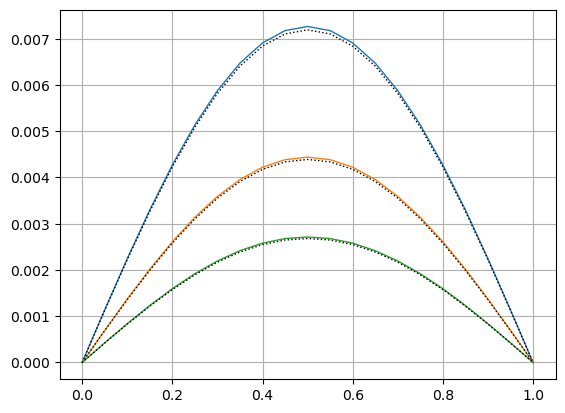

In [17]:
# plotando para alguns valores de t
fig, ax = plt.subplots()
ns = [400,440,480]
for n in ns:
    label='t='+str(n*ht)+'s'
    plt.plot(x,sol[n],label=label, lw=1)
    s_ex = sol_ex(x,n*ht)
    plt.plot(x, s_ex, "k:", lw=1)
#ax.legend()
ax.grid()
plt.show()

### Referências
Beu, Titus A. Introduction to numerical programming: a practical guide for scientists and engineers using Python and C/C++. CRC Press, 2014. ([PDF](https://www.if.ufrj.br/~sandra/MetComp/livros/TitusA.Beu-Introductiontonumericalprogramming_apracticalguideforscientistsandengineersusingPythonandC.pdf))

Burden, Richard, L. et al. Análise Numérica - Tradução da 10ª edição norte-americana. Disponível em: Minha Biblioteca, (3rd edição). Cengage Learning Brasil, 2016. ([Link](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/820))